# FUNSD+ 


The [FUNSD+](https://konfuzio.com/de/funsd-plus/) dataset is an enhanced version of the original [FUNSD (Form Understanding in Noisy Scanned Documents)](https://arxiv.org/pdf/1905.13538) dataset, designed for more comprehensive document understanding tasks. 

This notebook aims to provide a simple and easy-to-understand guide to the [FUNSD+](https://konfuzio.com/de/funsd-plus/) dataset. It will show you how to load the dataset and visualize the images along with their corresponding annotations. Through this guide, you'll gain a comprehensive understanding of the dataset's structure and features, which will help you effectively utilize it for various document understanding tasks.



## How to Load the FUNSD+ Dataset from the Hugging Face Datasets Library

### 1. Access the Dataset: 

Visit the [FUNSD+ dataset repository](https://huggingface.co/datasets/konfuzio/funsd_plus) on Hugging Face. Accept the terms and conditions to access its files and content.

### 2. Set Up Authentication:
   - Obtain your Hugging Face API token by signing into your Hugging Face account.
   - Add your API token to a `.env` file in the root directory of your project. The `.env` file should contain the following line:
     ```plaintext
     HF_TOKEN=your_hugging_face_token
     ```


### 3. Load the Dataset:
   - Use the `datasets` library from Hugging Face to load the FUNSD+ dataset.
   - Ensure you have the library installed and correctly configured to use your API token.


In [1]:
import sys
sys.path.append('..')
from src.utils import funsd_plus_plot_annotations
from datasets import load_dataset
from dotenv import load_dotenv

# Load API keys from .env file
load_dotenv()

# If the dataset is gated/private, make sure you have run huggingface-cli login
dataset = load_dataset("konfuzio/funsd_plus")

Using the latest cached version of the dataset since konfuzio/funsd_plus couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at /mnt/slow_data/pmoreira/.cache/huggingface/datasets/konfuzio___funsd_plus/default/0.0.0/f85ed0aee92f91338ad043d45782aaf4a16bfcc1 (last modified on Wed Jun  5 15:22:45 2024).


By following these steps, you'll be able to seamlessly access and load the FUNSD+ dataset for use in your projects.

## Dataset Overview


The dataset is divided into two subsets for **training** and **testing** purposes, with the training set containing `1026 rows` and the testing set containing `113 rows`, and both subsets have the same set of features.

The **features** encompass both image data and associated textual information, with annotations provided in the form of bounding boxes and labels. Additionally, there are features that group and link words, possibly for advanced tasks involving text relationships or contextual understanding.

### Structure of the Dataset

In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'words', 'bboxes', 'labels', 'grouped_words', 'linked_groups'],
        num_rows: 1026
    })
    test: Dataset({
        features: ['image', 'words', 'bboxes', 'labels', 'grouped_words', 'linked_groups'],
        num_rows: 113
    })
})

### Features

- **image**: Image data in the form of a 3D array (height x width x channels).
- **words**: A list of words present in the image.
- **labels**: A list of labels corresponding to each word.
- **bboxes**: A list of bounding boxes for each word in the image.
- **linking**: A list of links between words, possibly indicating relationships or connections between them
- **grouping**: A list of groups of words, possibly indicating a common context or relationship between them.
  

## Dataset Visualization

Dataset visualization is an essential step in understanding the dataset's structure and contents.
It helps you get a sense of the data distribution, the relationships between different features, and the overall quality of the dataset.

### Data distribution

The table compares the FUNSD and FUNSD+ datasets. FUNSD+ shows a significant increase in the number of documents, from 199 to 1139. The number of headers, questions, and answers also increased in FUNSD+. Specifically, headers rose from 563 to 1604, questions from 4343 to 14695, and answers from 3623 to 12154. Additionally, the percentage of questions with no answers increased from 16.6% in FUNSD to 18.3% in FUNSD+, and a new category, answers without questions, appears in FUNSD+ at 0.9%.


In [3]:
import pandas as pd

# Create the dataframe with the given data
data = {
    "": ["Documents", "Headers", "Questions", "Answers", "Questions with no answers", "Answers without questions*"],
    "FUNSD": [199, 563, 4343, 3623, "720 (16.6%)", "0"],
    "FUNSD+": [1113, 1604, 14695, 12154, "2691 (18.3%)", "114 (0.9%)"]
}

display(pd.DataFrame(data))

print("*Basically independent checkboxes in the table above.")
print("Note: Statistics of the FUNSD and FUNSD+ datasets are retrieved from the https://konfuzio.com/de/funsd-plus/.")
print("# TODO: replace the statistics with the actual statistics of both datasets")


,,FUNSD,FUNSD+
0,Documents,199,1113
1,Headers,563,1604
2,Questions,4343,14695
3,Answers,3623,12154
4,Questions with no answers,720 (16.6%),2691 (18.3%)
5,Answers without questions*,0,114 (0.9%)


*Basically independent checkboxes in the table above.
Note: Statistics of the FUNSD and FUNSD+ datasets are retrieved from the https://konfuzio.com/de/funsd-plus/.
# TODO: replace the statistics with the actual statistics of both datasets


## Sample Visualization


Visualizing the samples in the dataset can help you understand the document layout, the text distribution, and the complexity of the documents. It can also help you identify any potential issues with the image quality or preprocessing.

### Get the first sample in the train set and check its features

In [4]:
# Get the first sample in the train
sample = dataset['train'][0]

# Print the keys of the sample
print("Features:", sample.keys())

# Get the image, words, bboxes and labels from the sample
image = sample['image']
words = sample['words']
bboxes = sample['bboxes']
labels = sample['labels']

Features: dict_keys(['image', 'words', 'bboxes', 'labels', 'grouped_words', 'linked_groups'])


#### Plot the image 

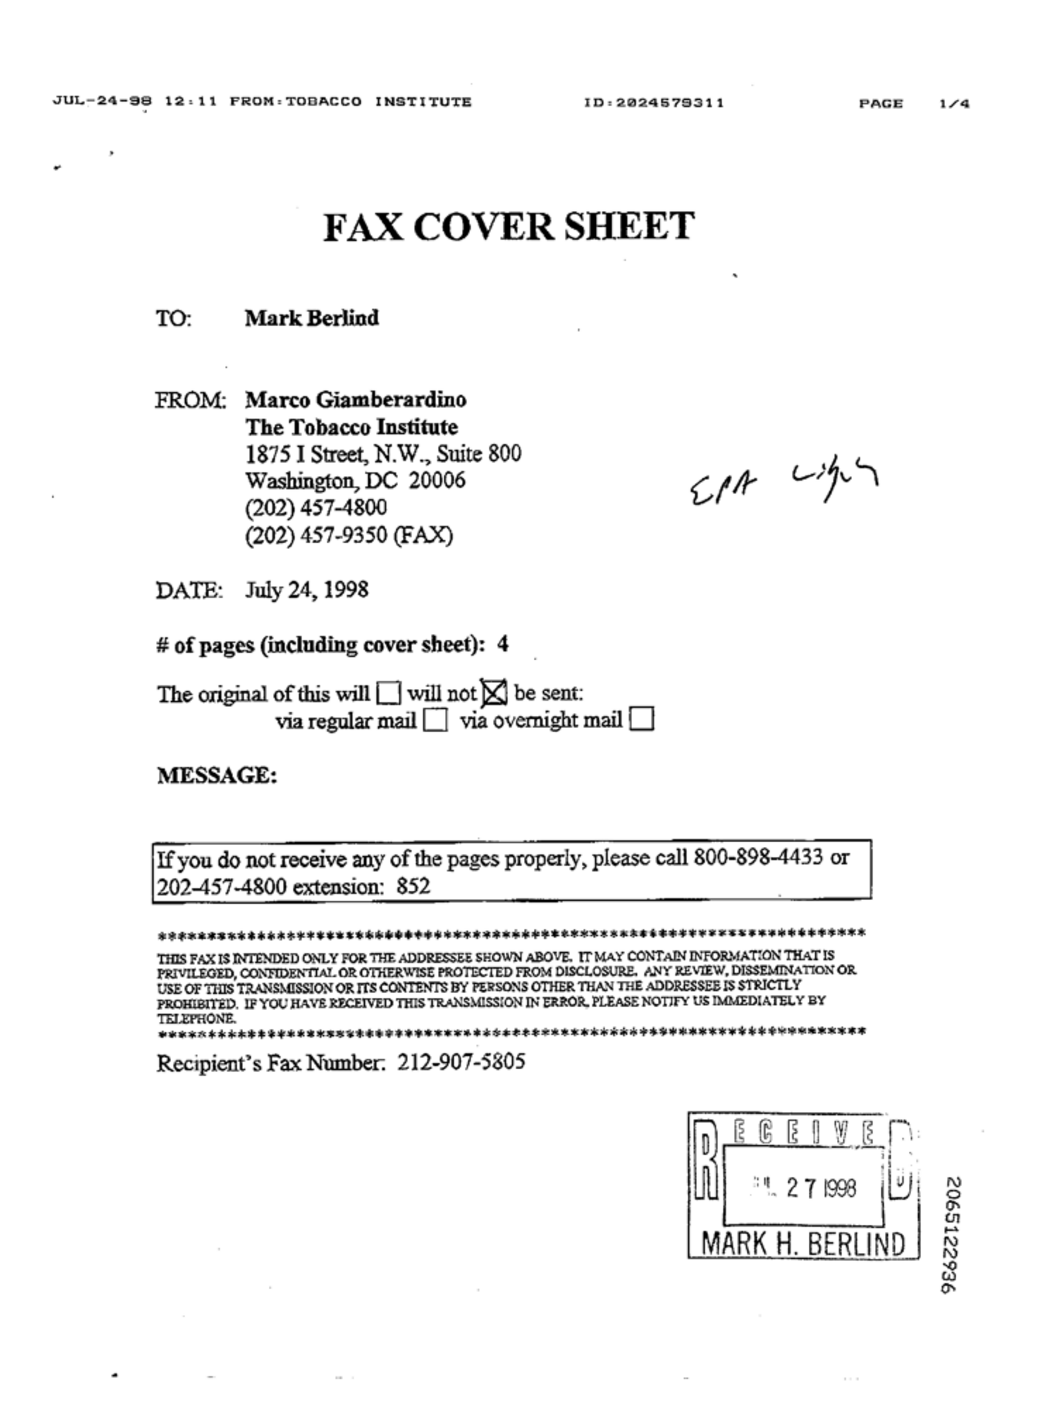

In [5]:
image

#### Print the first 10 words and labels

In [6]:
# Print the first 10 words and labels

import pandas as pd

# Define the labels as in the FUNSD+ dataset
LABELS = {
    0: 'other',
    1: 'header',
    2: 'question',
    3: 'answer',
    }

# make a dataframe from the sample using 'words' and 'labels' 
ocr_df = pd.DataFrame({'words': words, 'labels': labels})

# map the labels to the actual label names using the LABELS dictionary
ocr_df['labels'] = ocr_df['labels'].apply(lambda x: LABELS[x])

ocr_df.head(10)

,words,labels
0,JUL-24-98,other
1,12:11,other
2,FROM:,question
3,TOBACCO,answer
4,INSTITUTE,answer
5,ID:,question
6,2024579311,answer
7,PAGE,question
8,1/4,answer
9,FAX,header


### Plot annotations on the image


The colors of the bounding boxes correspond to the labels of the words. 
- `header` : **Yellow**
- `question`: **blue**
- `answer`: **green**
- `others`: **red**


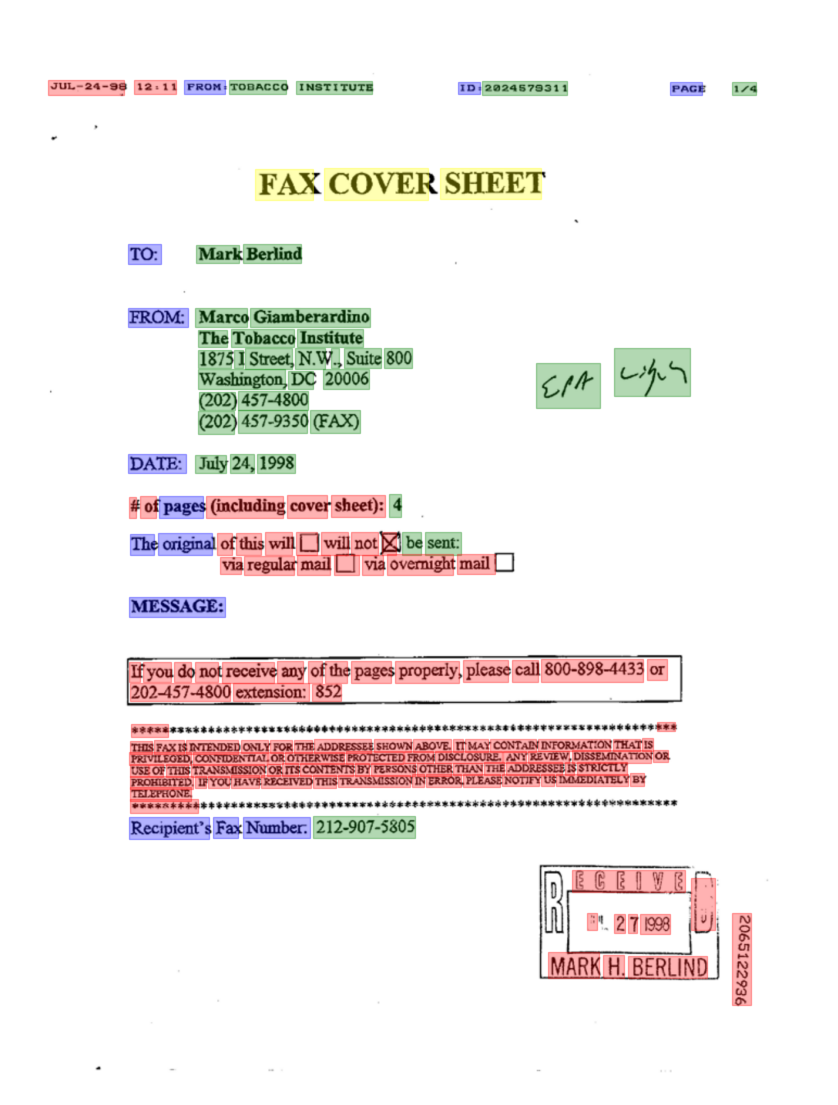

In [7]:
funsd_plus_plot_annotations(image, bboxes, labels)

## Saving the dataset to the disk

In [8]:
save_directory = "../datasets/FUNSD_plus"
dataset.save_to_disk(save_directory)

Saving the dataset (0/1 shards):   0%|          | 0/1026 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/113 [00:00<?, ? examples/s]

## Loading the dataset from the disk

In [11]:
from datasets import load_from_disk

save_directory = "../datasets/FUNSD_plus"
dataset = load_from_disk(save_directory)
train_dataset = dataset['train']
test_dataset = dataset['test']

### (Optional) Save the images in png format

In [ ]:
import os
from PIL import Image
import numpy as np

# Define directories to save the images
train_dir = os.path.join(save_directory, "train/images")
test_dir = os.path.join(save_directory, "test/images")

# Create directories if they don't exist
#os.makedirs(train_dir, exist_ok=True)
#os.makedirs(test_dir, exist_ok=True)

# Function to save images
def save_images(dataset, split, save_dir):
    for idx, sample in enumerate(dataset[split]):
        # Assuming the image is stored in the 'image' key
        image = sample['image']

        # Convert the image to a PIL image if it's in array format
        if isinstance(image, np.ndarray):
            image = Image.fromarray(image)

        # Define the image path
        image_path = os.path.join(save_dir, f"{split}_image_{idx}.png")
        
        # Save the image
        image.save(image_path)

# Save train images
save_images(dataset, 'train', train_dir)

# Save test images
save_images(dataset, 'test', test_dir)

print("Images saved successfully!")
